<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Sep1-2/Ejercicio_2_septiembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2 septiembre

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [ ]:
def L(x,y,w):
    f = w[0] + w[1]*x[0,:] + w[2]*x[1,:] + w[3]*x[2,:]+w[4]*x[3,:]
    costo= np.sum((f-y)**2)
    costo/=(2*len(x[0,:]))
    return costo

In [ ]:
def D(x,y,w):
    dw = np.zeros(len(w))
    f=0
    for i in range(len(w)):
        if i== 0:
            f = w[0]
        else:
            f += w[i]*x[i-1,:]
        for j in range(len(w)):
            if i== 0:
                dw[0] = np.sum((f-y))/len(x)
            else:
                dw[j] = np.sum((f-y)*x[j-1,:])/len(x)
    return dw

In [ ]:
def graddec(x,y,w,alph,iter,V,D):
    cost=[]
    for i in range(iter):
        dj=D(x,y,w)
        for j in range(len(w)):
            w[j] = w[j]-alph*dj[j]
        cost.append(V(x,y,w))
    return w, cost

In [ ]:
def gradiente_descendent(x, y, iterations, w0, learning_rate, tolerance):

    datax = [np.ones_like(x[0]), x[0], x[1], x[2], x[3]]
    X = np.vstack(datax).T
    current_w = np.array(w0)
    cost_array = np.array([])

    for i in range(iterations):
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        current_w = current_w - learning_rate*gradient
        cost_array  = np.append(np.sum((X @ current_w - y)**2), cost_array)

    return cost_array, current_w

1. Explora los datos, realiza gráficas del costo de las casas como función de cada característica.
2. Ajusta un modelo lineal usando todas las caraterísticas, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.
3. Normaliza las caracterpisticas y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.
4. Usa el modelo obtenido para predecir el valor de una casa con las siguientes características:
tamaño=1200,
numero de habitaciones=3,
pisos=1,
años=4

In [ ]:
houses = np.loadtxt("houses.txt", delimiter=',').T
Xh=houses[0:4]
th=houses[-1] #Costo de casa
labels=["Tamaño", "# habitaciones", "pisos", "años"]

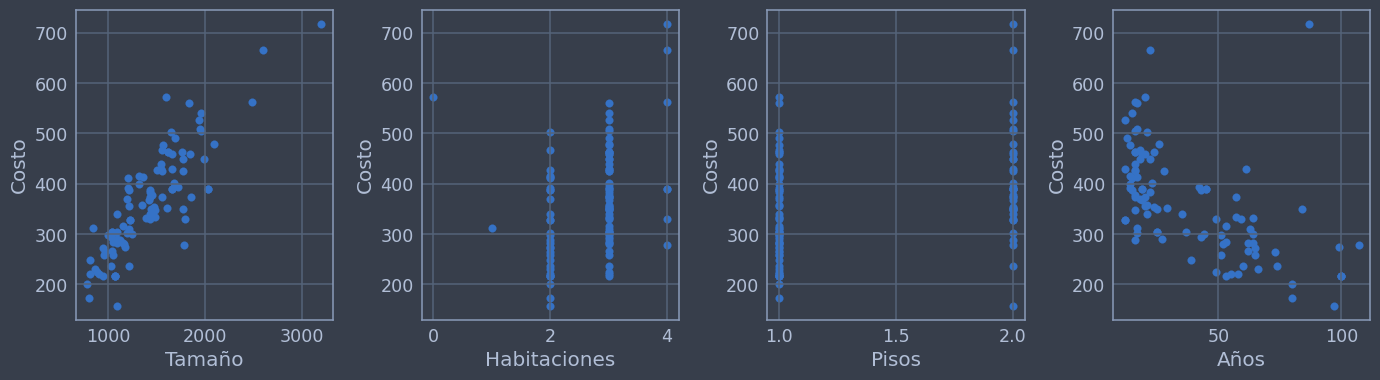

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh[0], th)
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh[1], th)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh[2], th)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh[3], th)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

2. Ajusta un modelo lineal usando todas las caraterísticas, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.

In [ ]:
w0=[0.,0.,0.,0.,0.]
iteraciones = 200000
w, costo = graddec(Xh,th,w0, 1e-10, iteraciones, L,D)
w

[-0.029954779223459373,
 0.044561622907894,
 0.015083662413119495,
 0.016623558323283345,
 -0.029954779223459373]

In [ ]:
costo

[71024.0920878151,
 71024.0921081902,
 71024.09212856529,
 71024.09214894037,
 71024.09216931547,
 71024.09218969056,
 71024.09221006566,
 71024.09223044076,
 71024.09225081585,
 71024.09227119094,
 71024.09229156603,
 71024.09231194113,
 71024.09233231624,
 71024.09235269132,
 71024.09237306644,
 71024.0923934415,
 71024.09241381663,
 71024.09243419171,
 71024.09245456681,
 71024.0924749419,
 71024.092495317,
 71024.0925156921,
 71024.09253606718,
 71024.0925564423,
 71024.09257681739,
 71024.09259719247,
 71024.09261756757,
 71024.09263794268,
 71024.0926583178,
 71024.09267869288,
 71024.09269906797,
 71024.09271944307,
 71024.09273981817,
 71024.09276019326,
 71024.09278056836,
 71024.09280094347,
 71024.09282131857,
 71024.09284169365,
 71024.09286206876,
 71024.09288244386,
 71024.09290281897,
 71024.09292319405,
 71024.09294356917,
 71024.09296394425,
 71024.09298431936,
 71024.09300469446,
 71024.09302506955,
 71024.09304544465,
 71024.09306581976,
 71024.09308619486,
 71024.09

In [ ]:
th_prediccion = w[0] + w[1]*Xh[0] + w[2]*Xh[1] + w[3]*Xh[2]+w[4]*Xh[3]
th_prediccion

array([-0.0139968 , -0.00840959,  0.00808286,  0.00277658,  0.00844506,
       -0.00415488, -0.01506475,  0.003455  , -0.00832687,  0.01574764,
       -0.01751367, -0.00230909, -0.00199161, -0.00128464, -0.00528773,
       -0.01236645, -0.01185637,  0.00451954,  0.00603071, -0.00829167,
       -0.0013128 , -0.00903957, -0.00182031, -0.00646056, -0.01471018,
       -0.00686172, -0.01180744, -0.01104088,  0.00238408, -0.01675555,
        0.00213997, -0.00788027,  0.00853413, -0.0087601 ,  0.01629818,
       -0.00585267,  0.00657699,  0.00239613,  0.00474645, -0.0127308 ,
        0.0049443 ,  0.00803954, -0.00182613, -0.01675555,  0.00049967,
        0.00826396, -0.00146847,  0.00119185, -0.01465419, -0.00227689,
        0.00093759, -0.00497881, -0.00231077, -0.0056996 ,  0.00529018,
       -0.0053013 ,  0.00211049, -0.00163925,  0.0012542 , -0.01027002,
       -0.0030581 , -0.0091938 , -0.01244617, -0.00608365, -0.00680893,
        0.00296787, -0.00860702, -0.01675555,  0.0168663 , -0.00

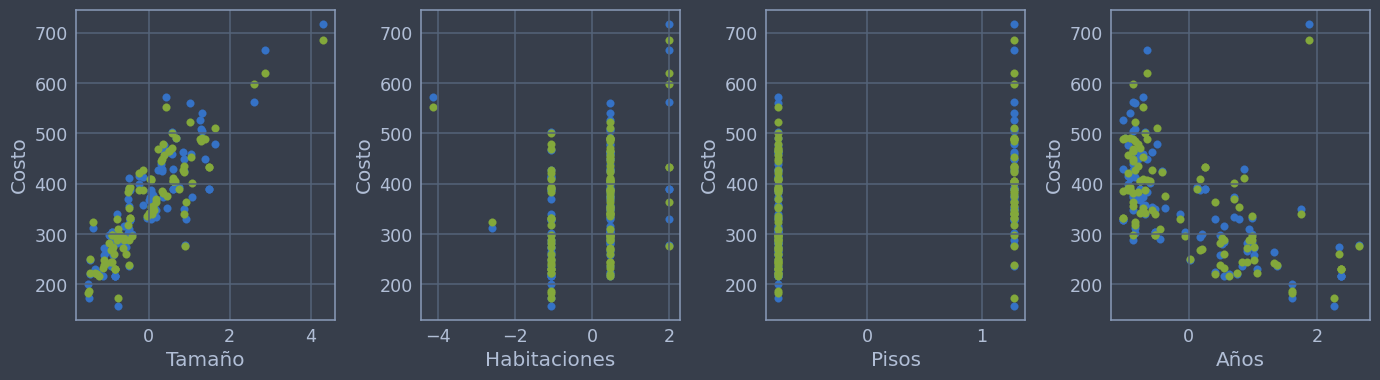

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh[0], th)
axs[0].scatter(Xh[0], th_prediccion)
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh[1], th)
axs[1].scatter(Xh[1], th_prediccion)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh[2], th)
axs[2].scatter(Xh[2], th_prediccion)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh[3], th)
axs[3].scatter(Xh[3], th_prediccion)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

3. Normaliza las caracterpisticas y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.

Normalizando según:
$$
    X_{normalizada} = \frac{X - \mu}{\sigma}
$$

In [ ]:
Xh_norm = Xh
for i in range(np.shape(Xh)[0]):
    mu = np.mean(Xh[i])
    sigma = np.std(Xh[i])
    Xh_norm[i] = (Xh[i] - mu) / sigma

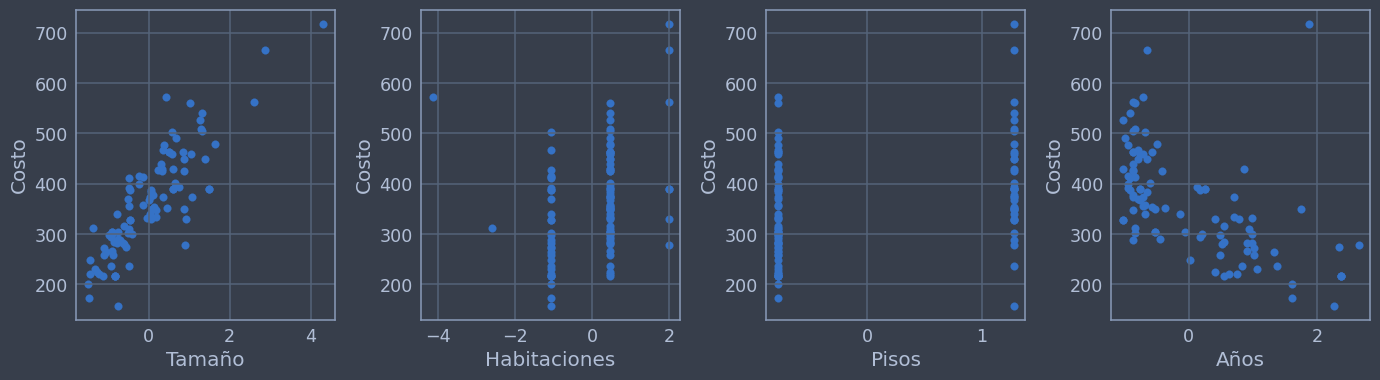

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh_norm[0,:], th)
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh_norm[1], th)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh_norm[2], th)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh_norm[3], th)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

In [ ]:
# Esta función no regresa valores adecuados de w
#w_norm, costo_norm = graddec(Xh_norm,th,w0, 1e-10, 20000, L,D)

costo_norm, w_norm = gradiente_descendent(Xh_norm, th, iteraciones, w0, 1e-2, 1e-11)
w_norm

array([362.23952   , 110.61335173, -21.47323884, -32.66070323,
       -37.77938362])

In [ ]:
costo_norm

array([  43942.26035299,   43942.26035299,   43942.26035299, ...,
       2635362.0339297 , 4535319.64078337, 7940137.39321763])

In [ ]:
th_norm = wh_norm[0] + wh_norm[1]*Xh_norm[0] + wh_norm[2]*Xh_norm[1] + wh_norm[3]*Xh_norm[2] + wh_norm[4]*Xh_norm[3]
th_norm

array([248.65591798, 295.58045873, 485.81689524, 389.61035726,
       491.96762765, 420.52811442, 223.57450463, 523.31626324,
       267.84509755, 685.00447351, 182.66630919, 318.25079707,
       479.88048606, 409.96399029, 393.83650249, 287.69238564,
       323.97747981, 405.90878584, 436.31413687, 270.13705992,
       500.97979389, 329.10878125, 388.16122321, 552.41859037,
       242.3019055 , 295.69011978, 283.12331913, 217.52238166,
       491.06890089, 229.84738873, 341.18908562, 291.69315602,
       489.92233626, 239.03010489, 597.95447816, 384.07367102,
       452.70618447, 401.4470128 , 405.86539494, 173.12727791,
       423.54102555, 434.16299105, 277.3044564 , 229.84738873,
       448.56536512, 488.89226144, 332.01742952, 465.74081655,
       222.41425711, 386.76114193, 456.59466253, 370.7813079 ,
       469.12413346, 310.3417961 , 426.44966536, 392.08127297,
       347.54993532, 339.61307315, 471.54323795, 243.74234709,
       298.2466504 , 273.2843497 , 250.25244212, 297.97

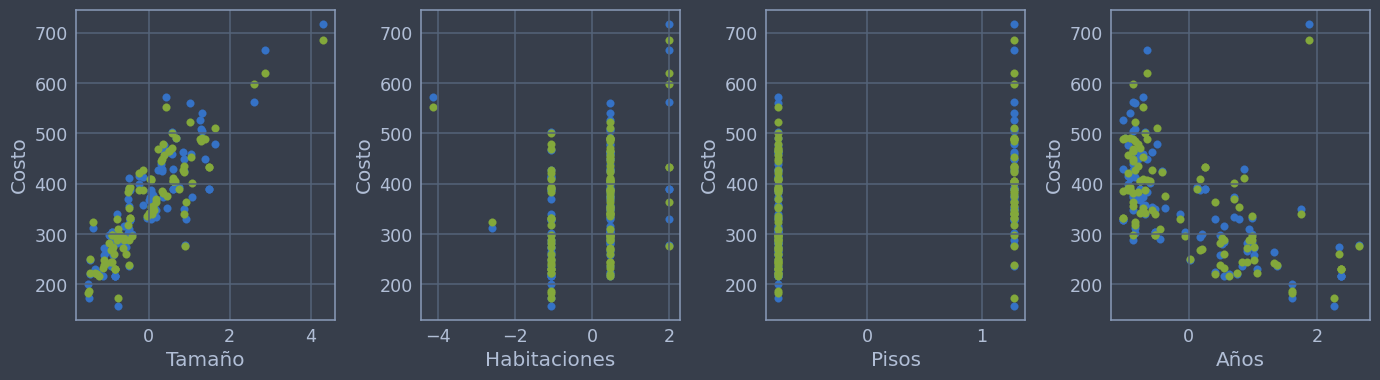

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh_norm[0], th)
axs[0].scatter(Xh_norm[0], th_norm, label='Prediccion')
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh_norm[1], th)
axs[1].scatter(Xh_norm[1], th_norm)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh_norm[2], th)
axs[2].scatter(Xh_norm[2], th_norm)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh_norm[3], th)
axs[3].scatter(Xh_norm[3], th_norm)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

4. Usa el modelo obtenido para predecir el valor de una casa con las siguientes características:
tamaño=1200,
numero de habitaciones=3,
pisos=1,
años=4

In [ ]:
tamaño = 1200
num_habitaciones = 3
pisos = 1
años = 4

In [ ]:
costo = wh_norm[0] + wh_norm[1]*tamaño + wh_norm[2]*num_habitaciones + wh_norm[3]*pisos + wh_norm[4]*años
costo

132850.06364677448

El modelo predice un costo de: 132850.06364677448
